#  Validación de datos 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Cargar dtos 
titanic_df = pd.read_csv(
    'D:/Antonio Medina/Documents/Python Scripts/validacion-de-datos/titanic.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
titanic_df.shape

(891, 12)

In [7]:
titanic_df.dtypes
#normalmente las variebles objetos son sinónimo de categorícas

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# para saver cuantas variables de cada tipo se tiene 
(
    titanic_df
    .dtypes
    .value_counts()
)

int64      5
object     5
float64    2
dtype: int64

In [9]:
#saber cuales de las filas tienen valores nulos
titanic_df.isnull().melt()

,variable,value
0,PassengerId,False
1,PassengerId,False
2,PassengerId,False
3,PassengerId,False
4,PassengerId,False
...,...,...
10687,Embarked,False
10688,Embarked,False
10689,Embarked,False
10690,Embarked,False


### Valores nulos 

In [10]:
#saber cuales de las filas tienen valores nulos
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
# Número de valores nulos 

(
    titanic_df
    .isnull()
    .sum()
)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Hay 177 datos faltantes en la variable edad y en Cabin hay 687 

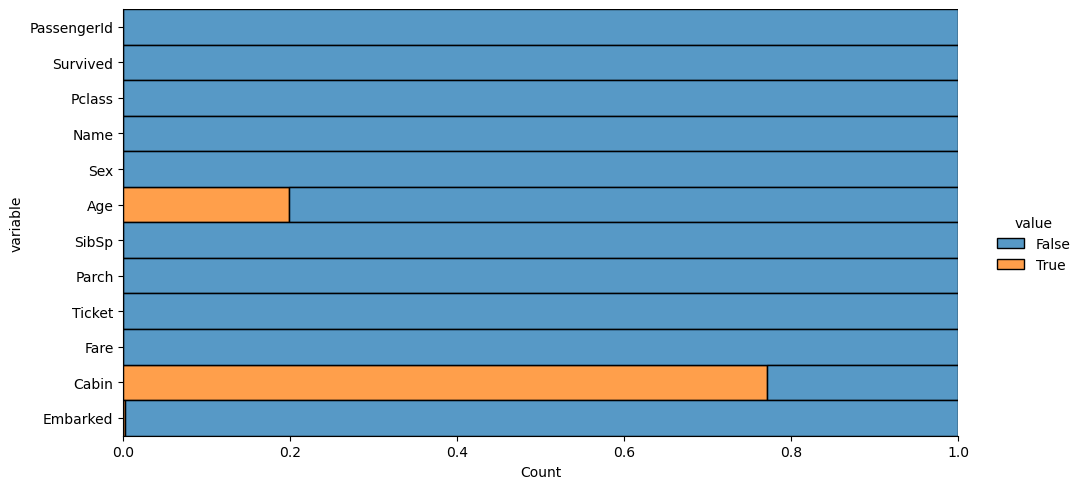

In [12]:
# para contar todos los valores en total cuento agrego la función sum dentro de la otra 
(
    titanic_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

### la proporción de cabil y age es significativa, esta última casi en un 80%

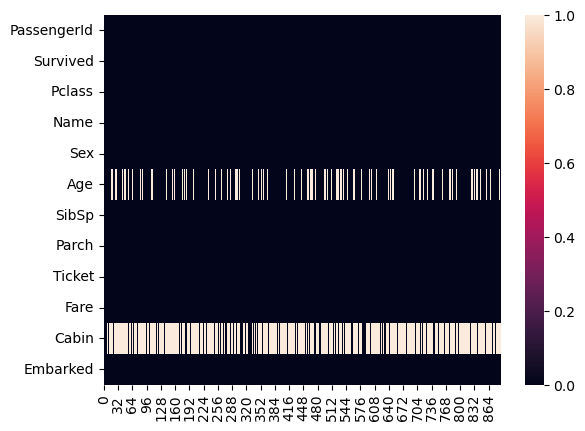

In [13]:
# vizualizar el conjunto completo de null en la data
# los valores blancos son los nulos 
(
    titanic_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:
        sns.heatmap(
            data= df
        )
    )
)
plt.show()

In [14]:
titanic_df.shape

891-183

708

In [15]:
# Eliminar datos nan
titanic_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
# En este caso se eliminaron 708, por ende no es viable

## Transformar las variables objeto en ctegoría

In [17]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
(
    titanic_df
.astype({
    'Sex': 'category'    
})
.describe(include= 'category')
)

,Sex
count,891
unique,2
top,male
freq,577


In [19]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
#graficar variables
(
    titanic_df
    .Sex
    .value_counts()
)

male      577
female    314
Name: Sex, dtype: int64

In [21]:
(
    titanic_df
    .Sex
    .value_counts()
    .plot(
        kind= 'bar'
    )
)

<AxesSubplot:>

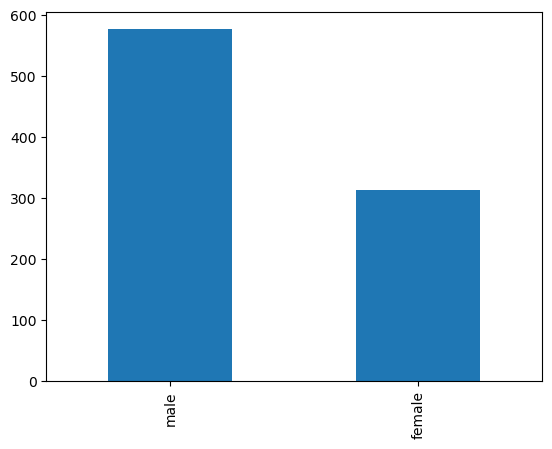

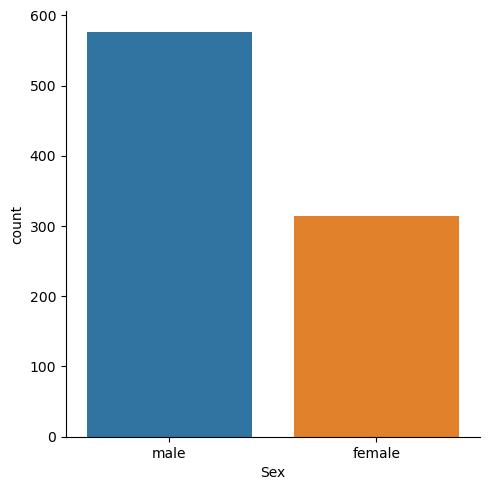

In [22]:
# Con seaborn
sns.catplot(
    data= titanic_df,
    x='Sex',
    kind= 'count'
)
plt.show()

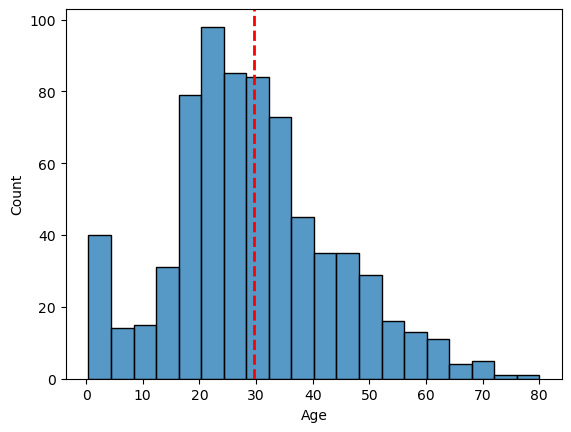

In [23]:
sns.histplot(
    data= titanic_df,
    x= 'Age'
)
plt.axvline(
    x= titanic_df.Age.mean(),
    color= 'red',
    linestyle ='dashed',
    linewidth= 2
)
plt.show()